In [468]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/saudi-arabia-used-cars-dataset/UsedCarsSA_Unclean_Ar.xlsx
/kaggle/input/saudi-arabia-used-cars-dataset/UsedCarsSA_Unclean_EN.csv
/kaggle/input/saudi-arabia-used-cars-dataset/UsedCarsSA_Clean_EN.csv


# import libraries 

In [469]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [470]:
df=pd.read_csv('/kaggle/input/saudi-arabia-used-cars-dataset/UsedCarsSA_Clean_EN.csv')
df.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [472]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,8035.000000,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05,5.369984e+04
std,5.757228,1.517747,3.474480e+05,7.198472e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.019600e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.375000e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


**check the null values**

In [473]:
df.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [474]:
df.duplicated().sum() # we have 3 duplicated we need to drop them 

3

In [475]:
df.drop_duplicates(inplace=True)
df.duplicated().sum() 

0

# ***EDA***

In [476]:
df.drop(columns='Negotiable',inplace=True) # drop the Negotiable column it as there is no effect of it 

In [477]:
df=df[df.Price>0]  # we have Prices = 0 so we exclude it 

df.describe()

,Year,Engine_Size,Mileage,Price
count,5506.000000,5506.000000,5.506000e+03,5.506000e+03
mean,2014.839085,3.178169,1.393799e+05,7.833494e+04
std,5.142642,1.465976,3.349330e+05,7.504151e+04
min,1963.000000,1.000000,1.000000e+02,1.000000e+00
25%,2013.000000,2.000000,4.600000e+04,3.500000e+04
50%,2016.000000,2.700000,1.010000e+05,5.800000e+04
75%,2018.000000,4.000000,1.800000e+05,9.500000e+04
max,2021.000000,9.000000,2.000000e+07,1.150000e+06


**which manufacturer type has the highest price**

Text(0.5, 1.0, ' manufacturer VS   car Price')

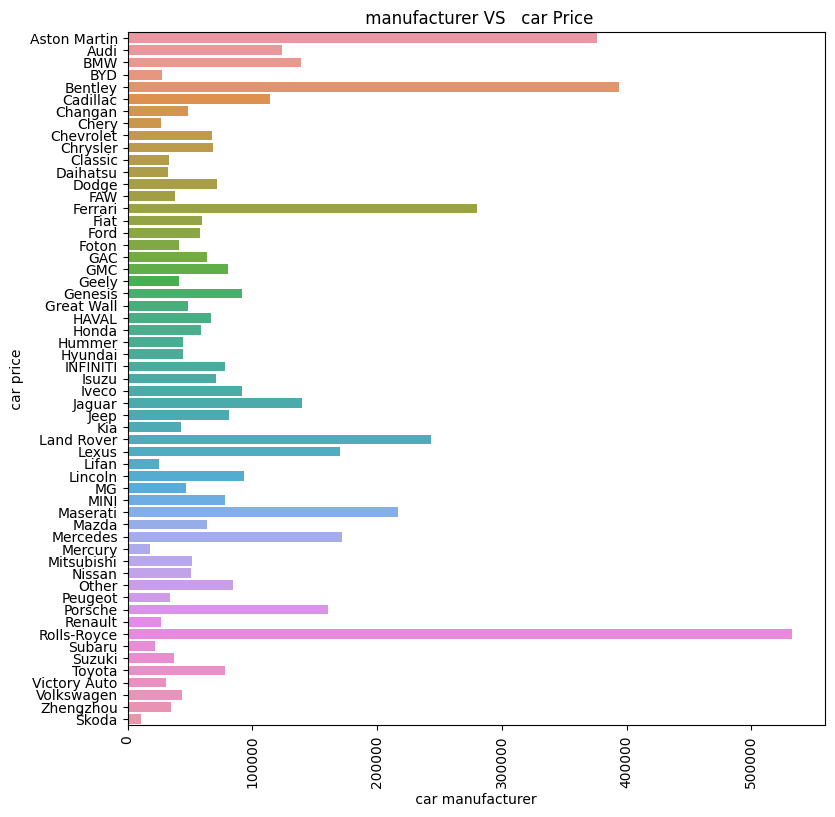

In [478]:
make_vs_price=df.groupby('Make')['Price'].mean()
plt.figure(figsize=(9, 9))
sns.barplot(x=make_vs_price.values,y=make_vs_price.index)
plt.xticks(rotation=90);
plt.xlabel(' car manufacturer ')
plt.ylabel(' car price ')
plt.title(' manufacturer VS   car Price')


**check the price distribution**

<Axes: xlabel='Price', ylabel='Count'>

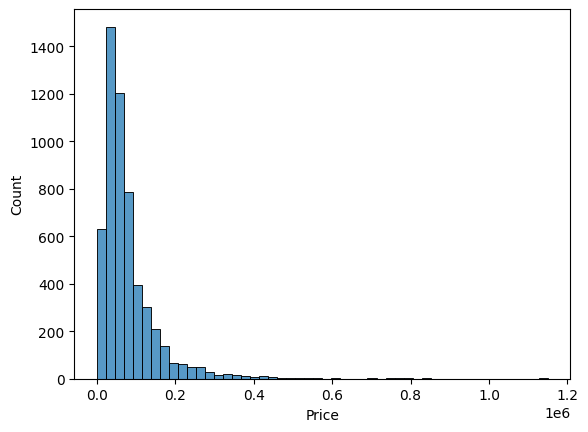

In [479]:
sns.histplot(df.Price,bins=50)

**apply log transform to price as it is a right-skewed**


In [480]:
# df['Price']=np.log1p(df.Price)
# sns.histplot(df.Price,bins=50) # the distribution after apply log transform is more uniform now 

**check the outliers for the numerical columns**

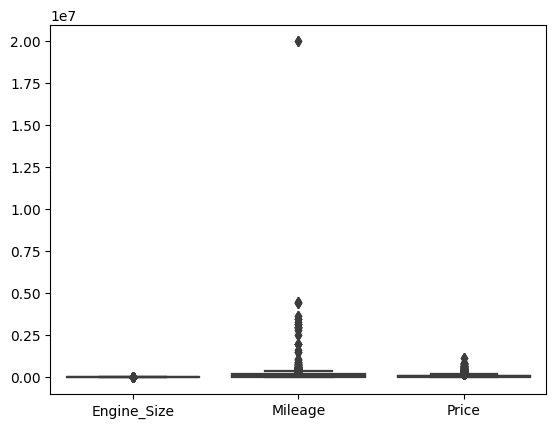

In [481]:
numeric=df.select_dtypes(include='number')
numeric=numeric.drop(columns='Year')
for n in numeric:
    sns.boxplot(data=numeric)

**check the Color values**

<Axes: xlabel='Color'>

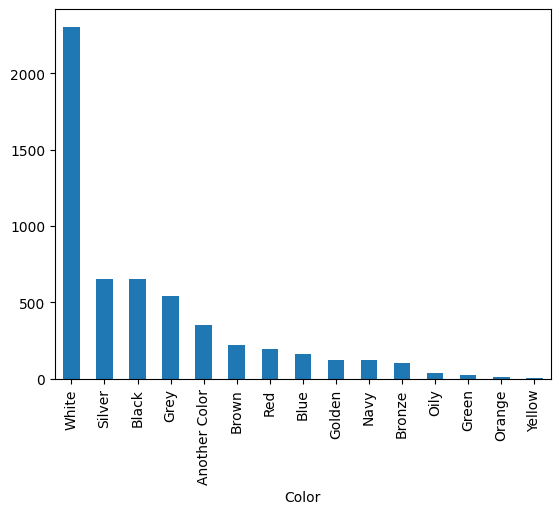

In [482]:
car_colour=df.Color.value_counts()
car_colour.plot(kind='bar')

**What area has the highest average price**

In [484]:
df.Origin.value_counts()

Origin
Saudi          4144
Gulf Arabic     718
Other           620
Unknown          24
Name: count, dtype: int64

**check the options values**


<Axes: xlabel='Options'>

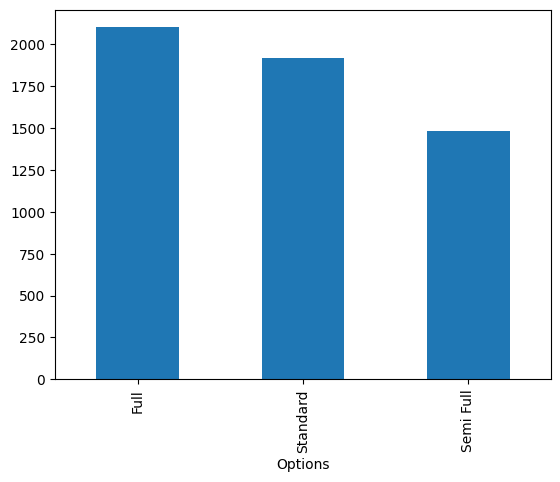

In [486]:
car_options=df.Options.value_counts()
car_options.plot(kind='bar')

In [ ]:
car_gear_type=df.Gear_Type.value_counts()
car_gear_type.plot(kind='bar')

<Axes: xlabel='Fuel_Type'>

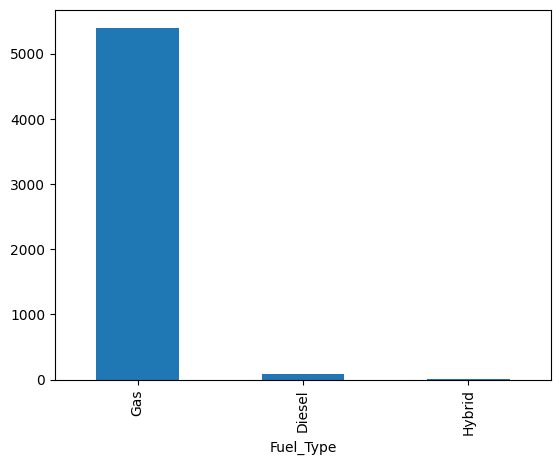

In [487]:
car_fuel_type=df.Fuel_Type.value_counts()
car_fuel_type.plot(kind='bar')

# **Dealing with categorical values**

In [488]:
cat_col=df.select_dtypes(include='object')
for col in cat_col:
    df=pd.get_dummies(df,columns=[col],dtype=int)


 # **split data into train-validation-test split**

In [ ]:
X=df.drop(columns='Price')
y=df.Price.values


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

 # **Train different model and evaluate them**

In [ ]:
models={
    
    'lr':LinearRegression(),
    'dt':DecisionTreeRegressor(),
    'rf':RandomForestRegressor(),
    'svr':SVR()
    
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse= mean_squared_error(y_pred, y_val)
    RMSE = np.sqrt(mse)
    print(name, RMSE)

**Random forest has the lowst RMSE so we will tune it to get more accurcy**
* **tune max_depth**
* **tune n_estimator**

In [ ]:
max_depth=[2,4,6,10,15,20,25,30,40,60,80,100] # diffrent max_depth
for d in max_depth:
    
    model=RandomForestRegressor(max_depth=d,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse= mean_squared_error(y_pred, y_val)
    RMSE = np.sqrt(mse)
    print(d, RMSE)


In [ ]:
n_estimators=[4,6,10,20,40,50,60,80,100] # diffrent max_depth
for n in n_estimators:
    
    model=RandomForestRegressor(n_estimators=n,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse= mean_squared_error(y_pred, y_val)
    RMSE = np.sqrt(mse)
    print(n, RMSE)


# Train the last model with parameters

In [489]:
model= RandomForestRegressor(max_depth=40,n_estimators=80,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
mse= mean_squared_error(y_pred, y_val)
RMSE = np.sqrt(mse)
RMSE

27316.24639546669

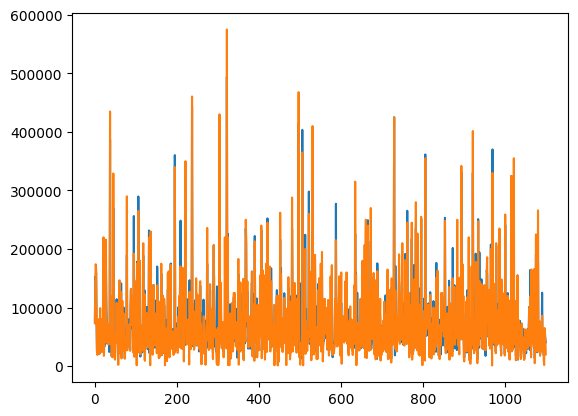

In [490]:
plt.plot(y_pred)
plt.plot(y_val)